Cell 1  Imports

PART 0: ENVIRONMENT SETUP AND IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os
import time
import warnings
warnings.filterwarnings('ignore')

Cell 2 Data Loading 

PART 1: DATA LOADING

In [2]:
df = pd.read_csv('heart_disease_dataset.csv')



In [3]:
print(f"Total number of samples: {len(df)}")
print(f"Total number of features: {df.shape[1]}")
print("\nFirst 5 records:")
display(df.head())
print(f"\nTotal missing values across all features: {df.isnull().sum().sum()}")


Total number of samples: 5000
Total number of features: 14

First 5 records:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,38.871687,Male,Typical Angina,100.490248,163.166661,NaN,LV hypertrophy,183.658119,No,0.114644,Upsloping,0.0,Normal,no disease
1,60.625755,Male,Asymptomatic,NaN,338.711395,True,LV hypertrophy,141.161921,NaN,2.361526,Downsloping,2.0,NaN,severe
2,64.306898,Male,NaN,146.355656,337.004035,True,LV hypertrophy,NaN,Yes,2.660477,Downsloping,2.0,Reversible defect,severe
3,57.457313,Female,Non-Anginal Pain,NaN,260.116075,True,NaN,150.353969,Yes,1.145959,Flat,1.0,Reversible defect,mild
4,53.394739,Male,Non-Anginal Pain,129.763455,224.948879,False,LV hypertrophy,147.834030,Yes,NaN,Flat,NaN,Reversible defect,mild



Total missing values across all features: 7660


Cell 3 EDA Basic Statistics 

PART 2: EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
print(f"Number of instances (rows): {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")
print("\nData types for each feature:")
print(df.dtypes)
print("\n" + "="*50)
print("DATASET DETAILED INFORMATION:")
print("="*50)
df.info()


Number of instances (rows): 5000
Number of features (columns): 14

Data types for each feature:
age              float64
sex               object
cp                object
trestbps         float64
chol             float64
fbs               object
restecg           object
thalach          float64
exang             object
oldpeak          float64
slope             object
ca               float64
thal              object
heart_disease     object
dtype: object

DATASET DETAILED INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4411 non-null   float64
 1   sex            4418 non-null   object 
 2   cp             4409 non-null   object 
 3   trestbps       4399 non-null   float64
 4   chol           4425 non-null   float64
 5   fbs            4421 non-null   object 
 6   restecg        4417 non-null   object 
 7   t

In [5]:
print("\n" + "="*50)
print("DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES:")
print("="*50)
display(df.describe())
print("\n" + "="*50)
print("HEART DISEASE CLASS DISTRIBUTION:")
print("="*50)
class_counts = df['heart_disease'].value_counts()
print(class_counts)
print("\n" + "="*50)
print("PERCENTAGE CONTRIBUTION OF EACH CLASS:")
print("="*50)
class_percentages = (df['heart_disease'].value_counts(normalize=True) * 100).round(2)
print(class_percentages)
print("\n" + "="*50)
print("CLASS BALANCE ANALYSIS:")
print("="*50)
largest_class = class_counts.max()
smallest_class = class_counts.min()
imbalance_ratio = largest_class / smallest_class
print(f"Largest class count: {largest_class}")
print(f"Smallest class count: {smallest_class}")
print(f"Imbalance ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 1.5:
    print("Dataset is IMBALANCED")
else:
    print("Dataset is BALANCED")



DESCRIPTIVE STATISTICS FOR NUMERICAL FEATURES:


,age,trestbps,chol,thalach,oldpeak,ca
count,4411.000000,4399.000000,4425.000000,4416.000000,4407.000000,4411.000000
mean,54.829901,133.019682,262.883223,150.289463,1.778127,1.378372
std,10.855032,19.913154,80.613567,22.141853,1.581597,1.022590
min,29.000000,94.000000,126.000000,101.383435,0.000000,0.000000
25%,46.027138,116.479869,188.967414,131.642083,0.485799,1.000000
50%,54.822873,134.500404,259.801646,149.953070,1.191017,1.000000
75%,63.539473,148.299363,327.875962,169.124221,2.626216,2.000000
max,77.000000,176.782096,423.482009,195.551682,5.165494,3.000000



HEART DISEASE CLASS DISTRIBUTION:
heart_disease
no disease          1030
mild                1028
immediate danger     994
severe               974
very mild            974
Name: count, dtype: int64

PERCENTAGE CONTRIBUTION OF EACH CLASS:
heart_disease
no disease          20.60
mild                20.56
immediate danger    19.88
severe              19.48
very mild           19.48
Name: proportion, dtype: float64

CLASS BALANCE ANALYSIS:
Largest class count: 1030
Smallest class count: 974
Imbalance ratio: 1.06
Dataset is BALANCED


Cell 4  EDA Visualizations


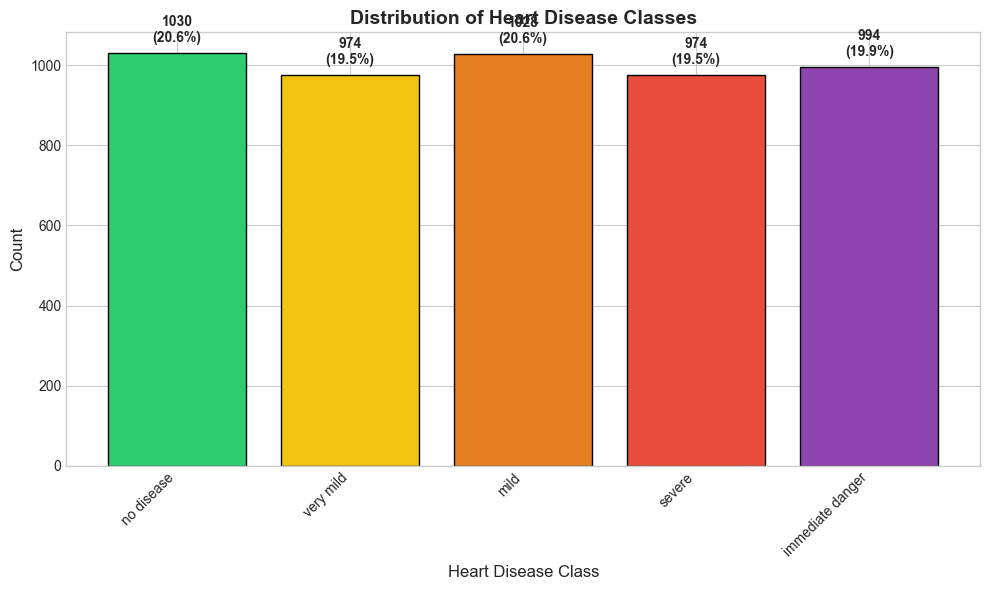

In [6]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
class_order = ['no disease', 'very mild', 'mild', 'severe', 'immediate danger']
class_counts_ordered = df['heart_disease'].value_counts().reindex(class_order)
bars = ax.bar(class_counts_ordered.index, class_counts_ordered.values, 
              color=['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c', '#8e44ad'], edgecolor='black')
total = len(df)
for bar, count in zip(bars, class_counts_ordered.values):
    percentage = (count / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
            f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Heart Disease Class', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Heart Disease Classes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=150)
plt.show()


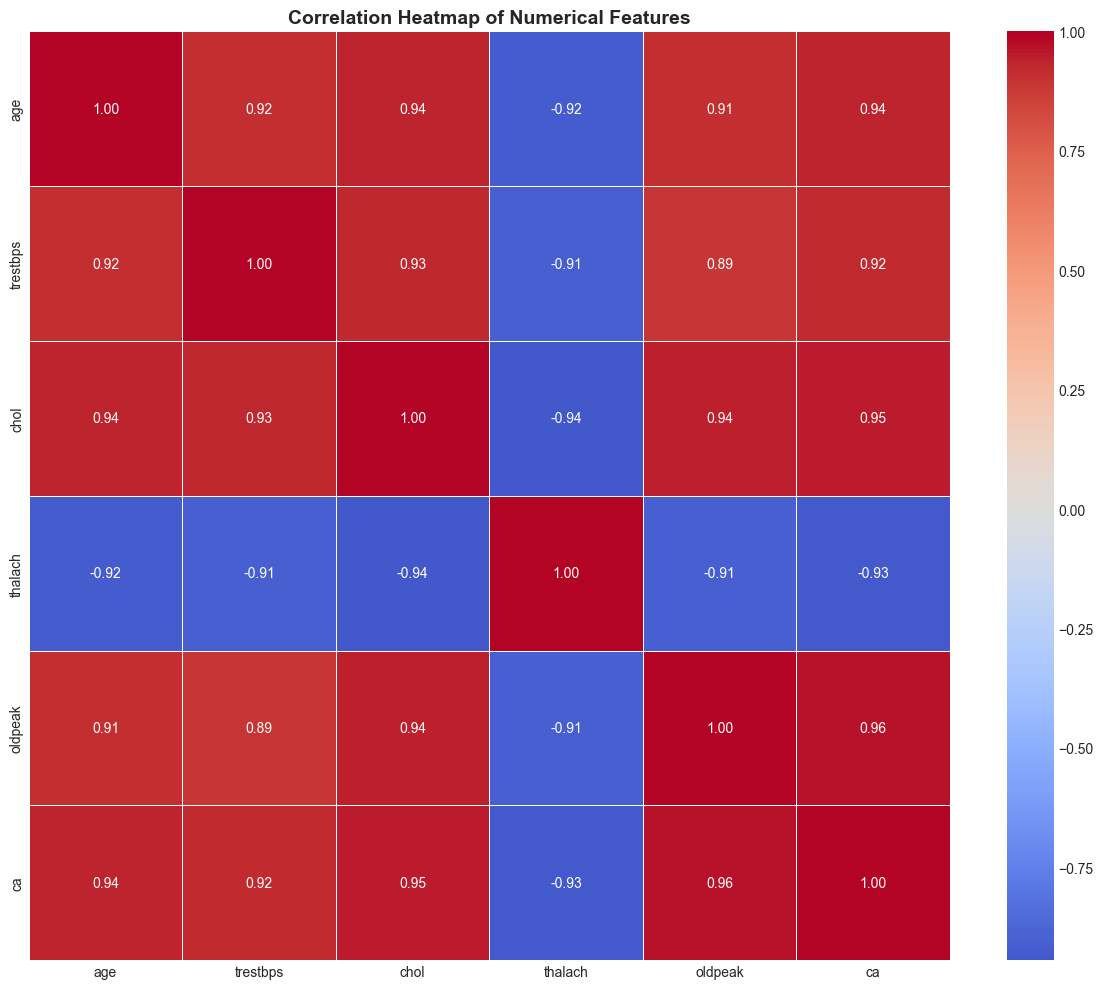

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150)
plt.show()


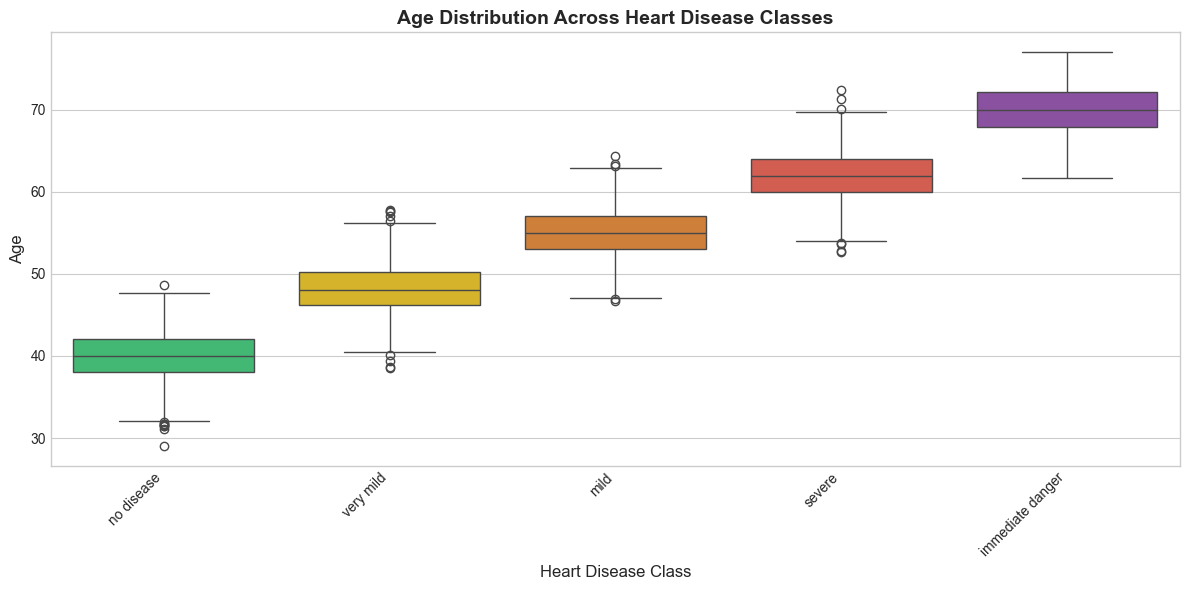

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
order = ['no disease', 'very mild', 'mild', 'severe', 'immediate danger']
sns.boxplot(x='heart_disease', y='age', data=df, order=order, 
            palette=['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c', '#8e44ad'], ax=ax)
ax.set_xlabel('Heart Disease Class', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title('Age Distribution Across Heart Disease Classes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('age_boxplot.png', dpi=150)
plt.show()


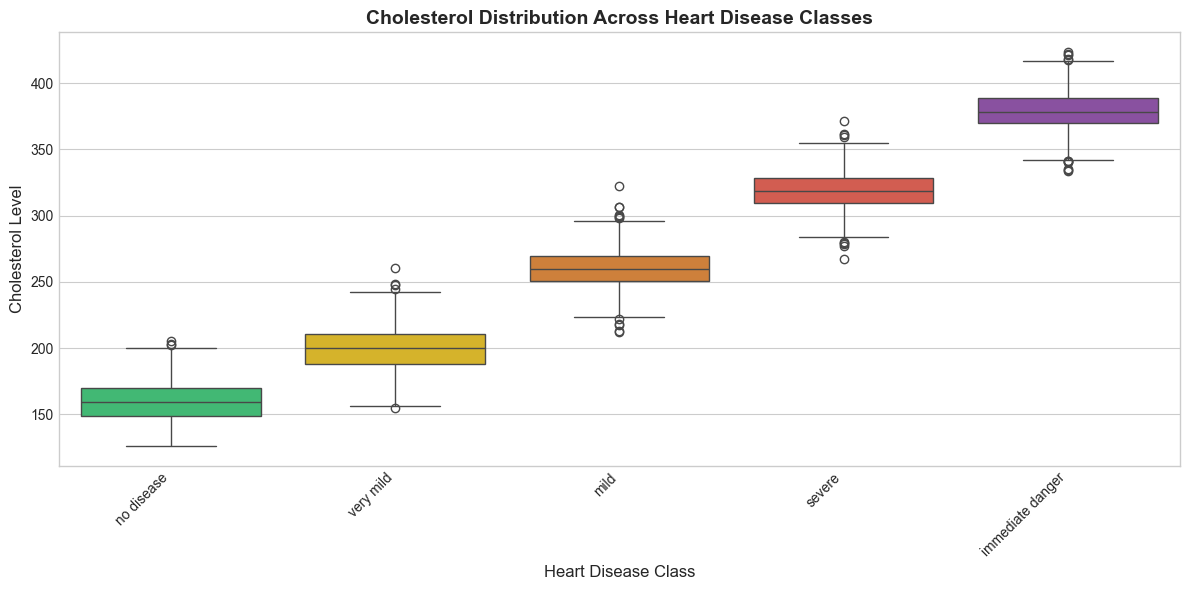

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='heart_disease', y='chol', data=df, order=order,
            palette=['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c', '#8e44ad'], ax=ax)
ax.set_xlabel('Heart Disease Class', fontsize=12)
ax.set_ylabel('Cholesterol Level', fontsize=12)
ax.set_title('Cholesterol Distribution Across Heart Disease Classes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('cholesterol_boxplot.png', dpi=150)
plt.show()


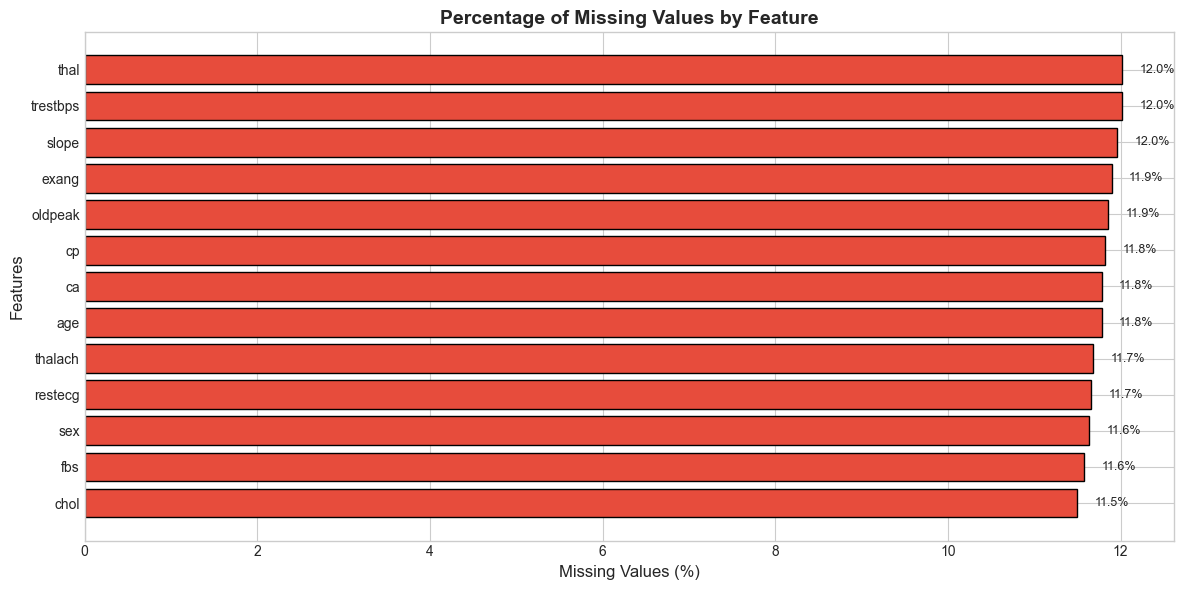

In [10]:

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

fig, ax = plt.subplots(figsize=(12, 6))
if missing_values.sum() > 0:
    missing_df = pd.DataFrame({'Feature': missing_percentage.index, 'Missing %': missing_percentage.values})
    missing_df = missing_df[missing_df['Missing %'] > 0].sort_values('Missing %', ascending=True)
    bars = ax.barh(missing_df['Feature'], missing_df['Missing %'], color='#e74c3c', edgecolor='black')
    ax.set_xlabel('Missing Values (%)', fontsize=12)
    ax.set_ylabel('Features', fontsize=12)
    ax.set_title('Percentage of Missing Values by Feature', fontsize=14, fontweight='bold')
    for bar, pct in zip(bars, missing_df['Missing %']):
        ax.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', va='center', fontsize=9)
else:
    ax.text(0.5, 0.5, 'No Missing Values Found', ha='center', va='center', 
            fontsize=16, transform=ax.transAxes)
    ax.set_title('Missing Values Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('missing_values.png', dpi=150)
plt.show()


In [11]:
print("\nMissing values per feature:")
print(missing_values[missing_values > 0])




Missing values per feature:
age         589
sex         582
cp          591
trestbps    601
chol        575
fbs         579
restecg     583
thalach     584
exang       595
oldpeak     593
slope       598
ca          589
thal        601
dtype: int64


Cell 5 Data Preprocessing 

In [12]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("TRAIN-TEST SPLIT COMPLETED")
print(f"   X_train shape: {X_train.shape}")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"   y_test shape: {y_test.shape}")
total_samples = len(df)
train_samples = len(X_train)
test_samples = len(X_test)
train_pct = (train_samples / total_samples) * 100
test_pct = (test_samples / total_samples) * 100

print(f" SAMPLE DISTRIBUTION:")
print(f"   Training samples: {train_samples} ({train_pct:.1f}%)")
print(f"   Testing samples: {test_samples} ({test_pct:.1f}%)")


TRAIN-TEST SPLIT COMPLETED
   X_train shape: (4000, 13)
   X_test shape: (1000, 13)
   y_train shape: (4000,)
   y_test shape: (1000,)
 SAMPLE DISTRIBUTION:
   Training samples: 4000 (80.0%)
   Testing samples: 1000 (20.0%)


In [13]:
original_dist = (y.value_counts(normalize=True) * 100).round(2)
train_dist = (y_train.value_counts(normalize=True) * 100).round(2)
test_dist = (y_test.value_counts(normalize=True) * 100).round(2)

stratification_df = pd.DataFrame({
    'Original (%)': original_dist,
    'Train (%)': train_dist,
    'Test (%)': test_dist
})
print("STRATIFICATION VERIFICATION:")
display(stratification_df)
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"NUMERICAL FEATURES ({len(numerical_features)}):")
print(f"   {numerical_features}")
print("\n   Skewness of numerical features:")
for col in numerical_features:
    skewness = df[col].skew()
    strategy = 'median' if abs(skewness) > 1 else 'mean'
    print(f"   {col}: skewness = {skewness:.2f} -> using {strategy}")

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())
])


STRATIFICATION VERIFICATION:


,Original (%),Train (%),Test (%)
heart_disease,,,
no disease,20.60,20.60,20.6
mild,20.56,20.58,20.5
immediate danger,19.88,19.88,19.9
severe,19.48,19.48,19.5
very mild,19.48,19.48,19.5


NUMERICAL FEATURES (6):
   ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

   Skewness of numerical features:
   age: skewness = 0.01 -> using mean
   trestbps: skewness = -0.05 -> using mean
   chol: skewness = 0.13 -> using mean
   thalach: skewness = -0.00 -> using mean
   oldpeak: skewness = 0.73 -> using mean
   ca: skewness = 0.30 -> using mean


In [14]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f" CATEGORICAL FEATURES ({len(categorical_features)}):")
print(f"   {categorical_features}")

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print(f" PREPROCESSING PIPELINE APPLIED:")
print(f"   Transformed training shape: {X_train_transformed.shape}")
print(f"   Transformed testing shape: {X_test_transformed.shape}")



 CATEGORICAL FEATURES (7):
   ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
 PREPROCESSING PIPELINE APPLIED:
   Transformed training shape: (4000, 25)
   Transformed testing shape: (1000, 25)


In [15]:

print(f" PREPROCESSING VERIFICATION:")
print(f"   Missing values in transformed training data: {np.isnan(X_train_transformed).sum()}")
print(f"   Missing values in transformed testing data: {np.isnan(X_test_transformed).sum()}")
print(f"   All features are numeric: {np.issubdtype(X_train_transformed.dtype, np.number)}")


 PREPROCESSING VERIFICATION:
   Missing values in transformed training data: 0
   Missing values in transformed testing data: 0
   All features are numeric: True



Cell 6 Model Training (Part 4)


PART 4: MODEL TRAINING AND EVALUATION

In [16]:
models = {
    'MLP/ANN': {
        'model': MLPClassifier(random_state=42, max_iter=500),
        'params': {
            'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'classifier__activation': ['relu', 'tanh'],
            'classifier__alpha': [0.0001, 0.001]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_split': [2, 5]
        }
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['rbf', 'linear'],
            'classifier__gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 9],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 5, 7]
        }
    }
}


In [17]:
results = []

print("="*70)
print("MODEL TRAINING WITH HYPERPARAMETER TUNING")
print("="*70)

for name, config in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()
    
    # Create full pipeline
    full_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', config['model'])
    ])
    
    # GridSearchCV
    grid_search = GridSearchCV(
        full_pipeline, 
        config['params'], 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Get results
    best_cv_accuracy = grid_search.best_score_
    train_accuracy = grid_search.score(X_train, y_train)
    test_accuracy = grid_search.score(X_test, y_test)
    
    print(f"   Best Parameters: {grid_search.best_params_}")
    print(f"   Best CV Accuracy: {best_cv_accuracy:.4f}")
    print(f"   Training Time: {training_time:.2f}s")
    
    results.append({
        'Model': name,
        'Best CV Accuracy': best_cv_accuracy,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Training Time (s)': training_time,
        'Best Params': grid_search.best_params_,
        'Best Estimator': grid_search.best_estimator_
    })

print("\n" + "="*70)
print("TRAINING COMPLETED FOR ALL MODELS")
print("="*70)


MODEL TRAINING WITH HYPERPARAMETER TUNING

Training MLP/ANN...
   Best Parameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100,)}
   Best CV Accuracy: 0.9985
   Training Time: 109.53s

Training Random Forest...
   Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
   Best CV Accuracy: 0.9998
   Training Time: 19.07s

Training SVM...
   Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
   Best CV Accuracy: 0.9988
   Training Time: 11.81s

Training KNN...
   Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}
   Best CV Accuracy: 0.9963
   Training Time: 4.20s

Training Gradient Boosting...
   Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
   Best CV Accuracy: 0.9995
   Training Time: 300.57

Cell 7 Model ComparisonCell


 MODEL COMPARISON & SELECTION

In [18]:

comparison_data = []
for r in results:
    overfitting_gap = r['Train Accuracy'] - r['Test Accuracy']
    
    if overfitting_gap > 0.05:
        status = 'Overfit'
    elif r['Test Accuracy'] < 0.6:
        status = 'Underfit'
    else:
        status = 'Best Fit'
    
    comparison_data.append({
        'Model': r['Model'],
        'Best CV Accuracy': round(r['Best CV Accuracy'], 4),
        'Train Accuracy': round(r['Train Accuracy'], 4),
        'Test Accuracy': round(r['Test Accuracy'], 4),
        'Overfitting Gap': round(overfitting_gap, 4),
        'Status': status
    })

comparison_df = pd.DataFrame(comparison_data)



In [19]:

comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False).reset_index(drop=True)

print("="*80)
print("MODEL COMPARISON TABLE")
print("="*80)
display(comparison_df)

best_model_name = comparison_df.iloc[0]['Model']
best_test_accuracy = comparison_df.iloc[0]['Test Accuracy']

print("\n" + "="*80)
print("BEST MODEL SELECTED")
print("="*80)
print(f"Model: {best_model_name}")
print(f"Test Accuracy: {best_test_accuracy:.4f}")


best_model = None
for r in results:
    if r['Model'] == best_model_name:
        best_model = r['Best Estimator']
        break


MODEL COMPARISON TABLE


,Model,Best CV Accuracy,Train Accuracy,Test Accuracy,Overfitting Gap,Status
0,Random Forest,0.9998,0.9998,0.999,0.0008,Best Fit
1,Gradient Boosting,0.9995,1.0000,0.999,0.0010,Best Fit
2,SVM,0.9988,1.0000,0.998,0.0020,Best Fit
3,MLP/ANN,0.9985,0.9995,0.997,0.0025,Best Fit
4,KNN,0.9962,1.0000,0.997,0.0030,Best Fit



BEST MODEL SELECTED
Model: Random Forest
Test Accuracy: 0.9990


Cell 8 Best Model Evaluation

DETAILED EVALUATION OF BEST MODEL

CLASSIFICATION REPORT - Random Forest
                  precision    recall  f1-score   support

      no disease       1.00      0.99      1.00       199
       very mild       1.00      1.00      1.00       205
            mild       1.00      1.00      1.00       206
          severe       0.99      1.00      1.00       195
immediate danger       1.00      1.00      1.00       195

        accuracy                           1.00      1000
       macro avg       1.00      1.00      1.00      1000
    weighted avg       1.00      1.00      1.00      1000



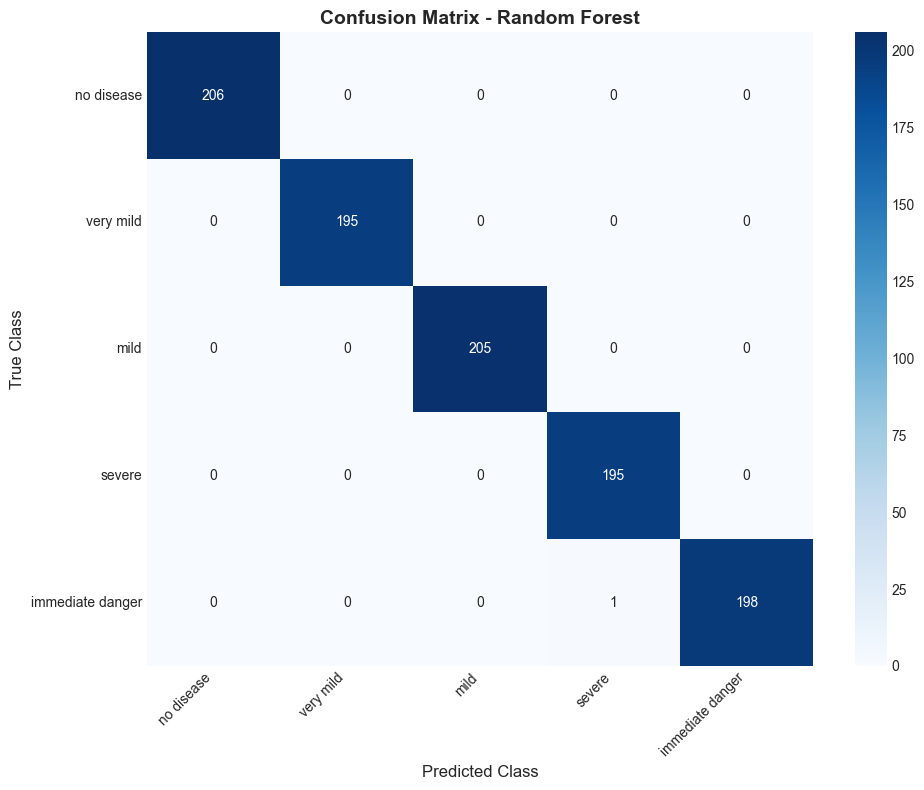

Confusion matrix saved as 'confusion_matrix.png'


In [20]:

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# a) Classification report
print("="*70)
print(f"CLASSIFICATION REPORT - {best_model_name}")
print("="*70)
class_names = ['no disease', 'very mild', 'mild', 'severe', 'immediate danger']
print(classification_report(y_test, y_pred, target_names=class_names))

# b) Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=class_names)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150)
plt.show()
print("Confusion matrix saved as 'confusion_matrix.png'")



Top 10 Important Features:


,Feature,Importance
4,oldpeak,0.137768
5,ca,0.136851
10,cp_Non-Anginal Pain,0.100932
2,chol,0.100131
23,thal_Normal,0.073161
9,cp_Atypical Angina,0.066384
11,cp_Typical Angina,0.049674
24,thal_Reversible defect,0.044417
22,thal_Fixed defect,0.042700
20,slope_Flat,0.037396


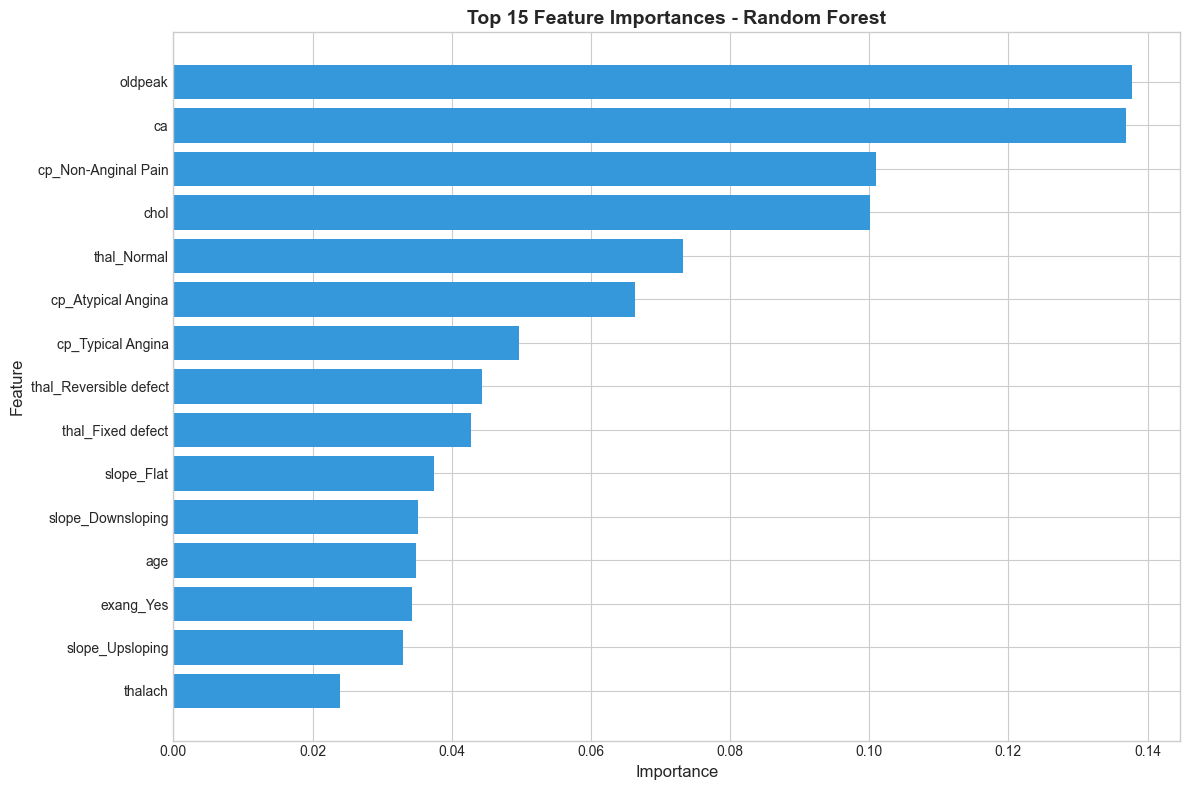

In [21]:

numerical_feature_names = numerical_features
categorical_feature_names = preprocessor.named_transformers_['categorical']['encoder'].get_feature_names_out(categorical_features).tolist()
all_feature_names = numerical_feature_names + categorical_feature_names

classifier = best_model.named_steps['classifier']

if hasattr(classifier, 'feature_importances_'):
    importances = classifier.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 Important Features:")
    display(importance_df.head(10))
    
    # Plot
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(15)
    plt.barh(top_features['Feature'], top_features['Importance'], color='#3498db')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Top 15 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=150)
    plt.show()
else:
    print(f"{best_model_name} does not support feature_importances_ attribute.")
    print("Feature importance analysis not available for this model type.")


Cell 9 Model Persistence 

In [22]:

os.makedirs('deployment', exist_ok=True)


model_path = 'deployment/best_model.pkl'
joblib.dump(best_model, model_path)
print(f"a) Model saved to: {model_path}")


feature_columns_path = 'deployment/feature_columns.txt'
with open(feature_columns_path, 'w') as f:
    for col in X.columns:
        f.write(f"{col}\n")
print(f"b) Feature columns saved to: {feature_columns_path}")

class_names_path = 'deployment/class_names.txt'
class_order = ['no disease', 'very mild', 'mild', 'severe', 'immediate danger']
with open(class_names_path, 'w') as f:
    for cls in class_order:
        f.write(f"{cls}\n")
print(f"c) Class names saved to: {class_names_path}")

print("\n" + "="*70)
print("ALL MODEL ARTIFACTS SAVED SUCCESSFULLY")
print("="*70)


a) Model saved to: deployment/best_model.pkl
b) Feature columns saved to: deployment/feature_columns.txt
c) Class names saved to: deployment/class_names.txt

ALL MODEL ARTIFACTS SAVED SUCCESSFULLY


Cell 10 Verification 1


In [23]:

loaded_model = joblib.load('deployment/best_model.pkl')

y_pred_loaded = loaded_model.predict(X_test)


verification_df = pd.DataFrame({
    'Actual': y_test.values[:20],
    'Predicted': y_pred_loaded[:20]
})
verification_df['Match'] = verification_df['Actual'] == verification_df['Predicted']

print("="*70)
print("VERIFICATION 1: Model Reload and Prediction Comparison (First 20 samples)")
print("="*70)
display(verification_df)

accuracy_match = (verification_df['Match'].sum() / len(verification_df)) * 100
print(f"\nPrediction Match Rate: {accuracy_match:.1f}%")


VERIFICATION 1: Model Reload and Prediction Comparison (First 20 samples)


,Actual,Predicted,Match
0,mild,mild,True
1,severe,severe,True
2,immediate danger,immediate danger,True
3,no disease,no disease,True
4,no disease,no disease,True
5,immediate danger,immediate danger,True
6,immediate danger,immediate danger,True
7,mild,mild,True
8,immediate danger,immediate danger,True
9,no disease,no disease,True



Prediction Match Rate: 100.0%


Cell 11 Verification 2

In [24]:

custom_patients = pd.DataFrame([
    {
        'age': 45, 'sex': 'Male', 'cp': 'Typical Angina', 'trestbps': 120,
        'chol': 200, 'fbs': False, 'restecg': 'Normal', 'thalach': 150,
        'exang': 'No', 'oldpeak': 0.5, 'slope': 'Upsloping', 'ca': 0.0, 'thal': 'Normal'
    },
    {
        'age': 65, 'sex': 'Female', 'cp': 'Asymptomatic', 'trestbps': 160,
        'chol': 350, 'fbs': True, 'restecg': 'LV hypertrophy', 'thalach': 110,
        'exang': 'Yes', 'oldpeak': 3.5, 'slope': 'Downsloping', 'ca': 3.0, 'thal': 'Reversible defect'
    },
    {
        'age': 55, 'sex': 'Male', 'cp': 'Non-Anginal Pain', 'trestbps': 140,
        'chol': 280, 'fbs': False, 'restecg': 'ST-T abnormality', 'thalach': 135,
        'exang': 'Yes', 'oldpeak': 2.0, 'slope': 'Flat', 'ca': 1.0, 'thal': 'Fixed defect'
    }
])


predictions = loaded_model.predict(custom_patients)
probabilities = loaded_model.predict_proba(custom_patients)


with open('deployment/class_names.txt', 'r') as f:
    class_names = [line.strip() for line in f.readlines()]


results_data = []
for i, (pred, probs) in enumerate(zip(predictions, probabilities)):
    row = {
        'Patient': f'Patient {i+1}',
        'Predicted Class': pred,
        'Confidence': f"{max(probs)*100:.2f}%"
    }
    for j, cls in enumerate(class_names):
        row[f'P({cls})'] = f"{probs[j]*100:.2f}%"
    results_data.append(row)

results_df = pd.DataFrame(results_data)

print("="*70)
print("VERIFICATION 2: Custom Patient Predictions")
print("="*70)
display(results_df)

print("\nCustom Patient Details:")
display(custom_patients)


VERIFICATION 2: Custom Patient Predictions


,Patient,Predicted Class,Confidence,P(no disease),P(very mild),P(mild),P(severe),P(immediate danger)
0,Patient 1,no disease,100.00%,0.00%,0.00%,100.00%,0.00%,0.00%
1,Patient 2,immediate danger,96.00%,96.00%,0.00%,0.00%,4.00%,0.00%
2,Patient 3,mild,51.99%,0.00%,51.99%,0.00%,20.00%,28.01%



Custom Patient Details:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,45,Male,Typical Angina,120,200,False,Normal,150,No,0.5,Upsloping,0.0,Normal
1,65,Female,Asymptomatic,160,350,True,LV hypertrophy,110,Yes,3.5,Downsloping,3.0,Reversible defect
2,55,Male,Non-Anginal Pain,140,280,False,ST-T abnormality,135,Yes,2.0,Flat,1.0,Fixed defect
